In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords # the common word
from nltk.stem.porter import PorterStemmer # Stemming 
from nltk.stem import WordNetLemmatizer # lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer # Way to convert sentence is vector of 1 and 0 after removing stop words 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML Dataset/Grouping of News Article.csv')

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
data.shape

(6335, 4)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
#new dataframe which contains title and text
data['content']=data['title']+' '+data['text']

In [ ]:
data.head()

,Unnamed: 0,title,text,label,content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [ ]:
x=data['content']
y=data['label']

In [ ]:
wordnet=WordNetLemmatizer()

In [ ]:
def lemmatize(content):
  # This function will take content of news article
  words=re.sub('[^a-zA-Z]', ' ', content) # Check a-z and A-Z
  words=words.lower() # Convert to lower case
  words=words.split() # Split the word
  words=[wordnet.lemmatize(word) for word in words if not word in stopwords.words('english')] 
  '''Check stopwords, if current word not in stop words then finds its root word'''
  words=' '.join(words) # Join all root word to create new sentence
  return words

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
data['content']=data['content'].apply(lemmatize) # Finding root word 

In [ ]:
data['content']

0       smell hillary fear daniel greenfield shillman ...
1       watch exact moment paul ryan committed politic...
2       kerry go paris gesture sympathy u secretary st...
3       bernie supporter twitter erupt anger dnc tried...
4       battle new york primary matter primary day new...
                              ...                        
6330    state department say find email clinton specia...
6331    p pb stand plutocratic pentagon p pb stand plu...
6332    anti trump protester tool oligarchy informatio...
6333    ethiopia obama seek progress peace security ea...
6334    jeb bush suddenly attacking trump matter jeb b...
Name: content, Length: 6335, dtype: object

In [ ]:
X = data['content'].values
Y = data['label'].values

In [ ]:
print(X.shape , y.shape) 

(6335,) (6335,)


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

In [ ]:
X=vectorizer.fit_transform(X)

In [ ]:
print(X)

  (0, 15900)	0.018229376503104744
  (0, 6512)	0.018178798685524755
  (0, 120)	0.02693543524248241
  (0, 23998)	0.0268160966719793
  (0, 6937)	0.030534710325732427
  (0, 8232)	0.020407231188780156
  (0, 46837)	0.021632500843231827
  (0, 34956)	0.013411137076760522
  (0, 11794)	0.02231026153743968
  (0, 35795)	0.02424371607909067
  (0, 57197)	0.02693543524248241
  (0, 48843)	0.016756562322323167
  (0, 29029)	0.010878580296750505
  (0, 31791)	0.011384948381124789
  (0, 45348)	0.021616954767285052
  (0, 53363)	0.02785082268316904
  (0, 41659)	0.024929997316328643
  (0, 9226)	0.025584754948809577
  (0, 3582)	0.01474563443696478
  (0, 48999)	0.019637555545397502
  (0, 7562)	0.02220579474446993
  (0, 54935)	0.01944481883559541
  (0, 46053)	0.018297533575851514
  (0, 56027)	0.021373924708419013
  (0, 1546)	0.017674880183706738
  :	:
  (6334, 43121)	0.05897088381554205
  (6334, 2383)	0.025989866338429986
  (6334, 19687)	0.021924850832378526
  (6334, 51863)	0.011465790689556209
  (6334, 12813)	0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=83)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(6335, 58240) (5068, 58240) (1267, 58240)


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Evaluation

In [ ]:
y_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train,y_pred)

In [ ]:
print('train accuracy score : ', round(train_accuracy*100,3),'%')

train accuracy score :  95.501 %


In [ ]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,y_pred)

In [ ]:
print('test accuracy score : ', round(test_accuracy*100,3),'%')

test accuracy score :  91.318 %


In [ ]:
confusion_matrix(Y_test,y_pred)

array([[593,  40],
       [ 70, 564]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


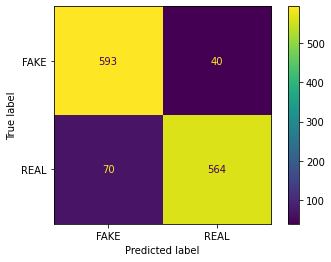

In [ ]:
plot_confusion_matrix(model, X_test, Y_test)  
plt.show()